# Zadanie 7 (26.01.2025)
Wykonać wykresy takie, jak na Wykładzie 9, slajdy 21-22. W tym celu należy zebrać dane dla wybranej linii tramwajowej dla 30-40 punktów, zachowując odstęp 1 minuty pomiędzy kolejnymi pobraniami (można wykorzystać do tego funkcję *sleep(60)* z pakietu **time**). Następnie wykreślić położenia, używając biblioteki leaflet oraz policzyć prędkość tramwaju na kolejnych odcinkach. Odległość pomiędzy kolejnymi punktami można policzyć korzystając z funkcji **geopy.distance.geodesic()**.

In [2]:
from IPython.display import HTML

def show_map(m):
    map_html = m._repr_html_()
    custom_html = f"""
    <div style="width: 600px; margin: auto;">
        {map_html}
    </div>
    """
    display(HTML(custom_html))

In [3]:
# from utils import collect_data
# data = collect_data(40, 60, 'data/')

In [7]:
from utils import get_random_vehicle_line_data
lats, lons, times = get_random_vehicle_line_data(17, 'data/data_20012025_21.csv')

## Map of time passed

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import folium
import branca.colormap as cm

m = folium.Map(location=(52.25, 21.00), max_zoom=12, min_zoom=12, tiles="cartodb positron", no_touch=True)

# Create a color map based on the time values
min_time, max_time = 0, (max(times) - min(times)).seconds / 60
colormap = cm.LinearColormap(colors=["blue", "green", "yellow", "red"], vmin=min_time, vmax=max_time)
colormap.caption = "Czas w minutach"
print(lons)
# Add segmented polylines with colors based on time
for i in range(len(lats) - 1):
    start = (lats[i], lons[i])
    end = (lats[i + 1], lons[i + 1])
    time_color = colormap((times[i] - min(times)).seconds / 60)  # Color based on the starting point's time
    
    folium.PolyLine(
        locations=[start, end],
        color=time_color,
        weight=6,
        opacity=0.8
    ).add_to(m)

colormap.add_to(m)

show_map(m)

[20.984848, 20.985432, 20.988312, 20.988676, 20.9918, 20.993406, 20.995968, 20.997192, 20.998625, 21.001038, 21.00176, 21.00176, 21.003305, 21.004974, 21.005032, 21.005865, 21.007353, 21.008013, 21.003626, 20.999397, 21.000301, 21.001152, 21.001776, 21.001816, 21.00201, 21.002031, 21.00204, 21.00214, 21.002127, 21.00221, 21.000608, 20.995756, 20.990576, 20.988882, 20.988943, 20.98894, 20.98894, 20.988937, 20.988876, 20.988874]


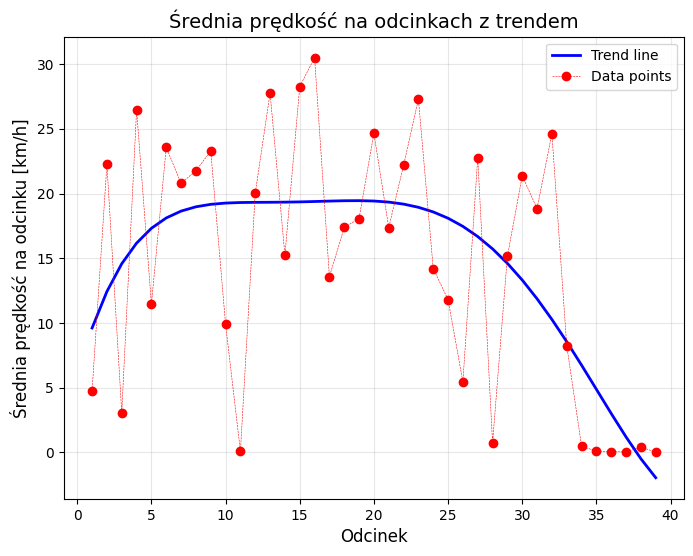

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import distance

y = [distance((lats[i], lons[i]), (lats[i+1], lons[i+1])).km / (times[i + 1] - times[i]).seconds * 60 * 60  for i in range(len(times) - 1)]
x = np.arange(len(y)) + 1
# Smooth line (trend)
z = np.polyfit(x, y, 5)
smooth_y = np.polyval(z, x)

# Plotting
plt.figure(figsize=(8, 6))

# Smooth line
plt.plot(x, smooth_y, color='blue', linewidth=2, label='Trend line')

# Points and dotted lines
plt.plot(x, y, 'ro--', lw=0.4, label='Data points')

# Labels and title
plt.xlabel('Odcinek', fontsize=12)
plt.ylabel('Średnia prędkość na odcinku [km/h]', fontsize=12)
plt.title('Średnia prędkość na odcinkach z trendem', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
